# Cartography

In [1]:
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import sys
import cartopy
print("Python Version : ", sys.version)
print("Cartopy Version : ", cartopy.__version__)

Python Version :  3.6.9 (default, Nov  7 2019, 10:44:02) 
[GCC 8.3.0]
Cartopy Version :  0.17.1.dev147+HEAD.detached.at.5e624fe


## Load data

In [2]:
import pandas as pd

#load dataframe from csv
#df = pd.read_csv("/data/covid-19.csv/part-00000-c4961e73-ab4a-4d1e-a90d-2891f59b2fbd.csv")
df = pd.read_csv("/data/time_series_covid19_deaths_global_narrow.csv")

#print dataframe
print(df)

      Province/State Country/Region        Lat       Long        Date  Value  \
0                NaN    Afghanistan  33.939110  67.709953  2020-10-01   1458   
1                NaN    Afghanistan  33.939110  67.709953  2020-09-30   1458   
2                NaN    Afghanistan  33.939110  67.709953  2020-09-29   1458   
3                NaN    Afghanistan  33.939110  67.709953  2020-09-28   1455   
4                NaN    Afghanistan  33.939110  67.709953  2020-09-27   1453   
...              ...            ...        ...        ...         ...    ...   
67559            NaN       Zimbabwe -19.015438  29.154857  2020-01-26      0   
67560            NaN       Zimbabwe -19.015438  29.154857  2020-01-25      0   
67561            NaN       Zimbabwe -19.015438  29.154857  2020-01-24      0   
67562            NaN       Zimbabwe -19.015438  29.154857  2020-01-23      0   
67563            NaN       Zimbabwe -19.015438  29.154857  2020-01-22      0   

      ISO 3166-1 Alpha 3-Codes  Region 

In [3]:
df[['Country/Region','Province/State', 'Lat', 'Long']].drop_duplicates().reset_index()

,index,Country/Region,Province/State,Lat,Long
0,0,Afghanistan,NaN,33.939110,67.709953
1,254,Albania,NaN,41.153300,20.168300
2,508,Algeria,NaN,28.033900,1.659600
3,762,Andorra,NaN,42.506300,1.521800
4,1016,Angola,NaN,-11.202700,17.873900
...,...,...,...,...,...
261,66294,West Bank and Gaza,NaN,31.952200,35.233200
262,66548,Western Sahara,NaN,24.215500,-12.885800
263,66802,Yemen,NaN,15.552727,48.516388
264,67056,Zambia,NaN,-13.133897,27.849332


In [4]:
countries = df.drop_duplicates(['Country/Region','Province/State', 'Lat', 'Long']
                  )[['Country/Region','Province/State', 'Lat', 'Long']].reset_index()
countries

,index,Country/Region,Province/State,Lat,Long
0,0,Afghanistan,NaN,33.939110,67.709953
1,254,Albania,NaN,41.153300,20.168300
2,508,Algeria,NaN,28.033900,1.659600
3,762,Andorra,NaN,42.506300,1.521800
4,1016,Angola,NaN,-11.202700,17.873900
...,...,...,...,...,...
261,66294,West Bank and Gaza,NaN,31.952200,35.233200
262,66548,Western Sahara,NaN,24.215500,-12.885800
263,66802,Yemen,NaN,15.552727,48.516388
264,67056,Zambia,NaN,-13.133897,27.849332


## create latitude & longitube based on IP

In [5]:
import requests
import json

def ipInfo(addr='', debug=False):
    '''Return Info from IP'''
    if addr == '':
        raise Exception("Must pass a non empty addr");

    url = 'https://geolocation-db.com/jsonp/' + addr
    if (debug):
        print('Downloading from:', url)

    with requests.get(url, allow_redirects=True) as urlobj:
        result = urlobj.text
        result = result.split("(")[1].strip(")")
        data = json.loads(result)
        if (debug):
            print(data)

        IP=data['IPv4']
        code=data['country_code']
        country=data['country_name']
        state=data['state']
        city = data['city']
        latitude = data['latitude']
        longitude = data['longitude']
        if (debug):
            print('IP : {4} \nCode : {0} \nCountry : {2} \nState : {1} \nCity : {3}\n latitude:{5}\n longitude:{6}'.format(code,state,country,city,IP,latitude,longitude))
        return IP, country, state, city, latitude, longitude

ipInfo("8.8.8.8", True)

{'country_code': 'US', 'country_name': 'United States', 'city': None, 'postal': None, 'latitude': 37.751, 'longitude': -97.822, 'IPv4': '8.8.8.8', 'state': None}
IP : 8.8.8.8 
Code : US 
Country : United States 
State : None 
City : None
 latitude:37.751
 longitude:-97.822


('8.8.8.8', 'United States', None, None, 37.751, -97.822)

In [6]:
import pandas as pd

raw_data = {'ip': ['8.8.8.8', '8.8.4.4']}
ips = pd.DataFrame(raw_data)


appended_data = [] 
for value in ips['ip']: 
    if not pd.isna(value):
        try:
            info = ipInfo(value)
            appended_data.append(info)
        except:
            continue

ipdf = pd.DataFrame()
ipdf = ipdf.append(pd.DataFrame(appended_data), ignore_index=True)
ipdf.columns = ['ip','country_name','state','city','latitude','longitude']
print(ipdf)

        ip   country_name state  city  latitude  longitude
0  8.8.8.8  United States  None  None    37.751    -97.822
1  8.8.4.4  United States  None  None    37.751    -97.822


# Cartopy

Good tutorial : https://coderzcolumn.com/tutorials/data-science/cartopy-basic-maps-scatter-map-bubble-map-and-connection-map

IF you get "Geometry must be a Point or LineString" & Crash, please run :

```
pip uninstall shapely
pip install shapely --no-binary shapely
```

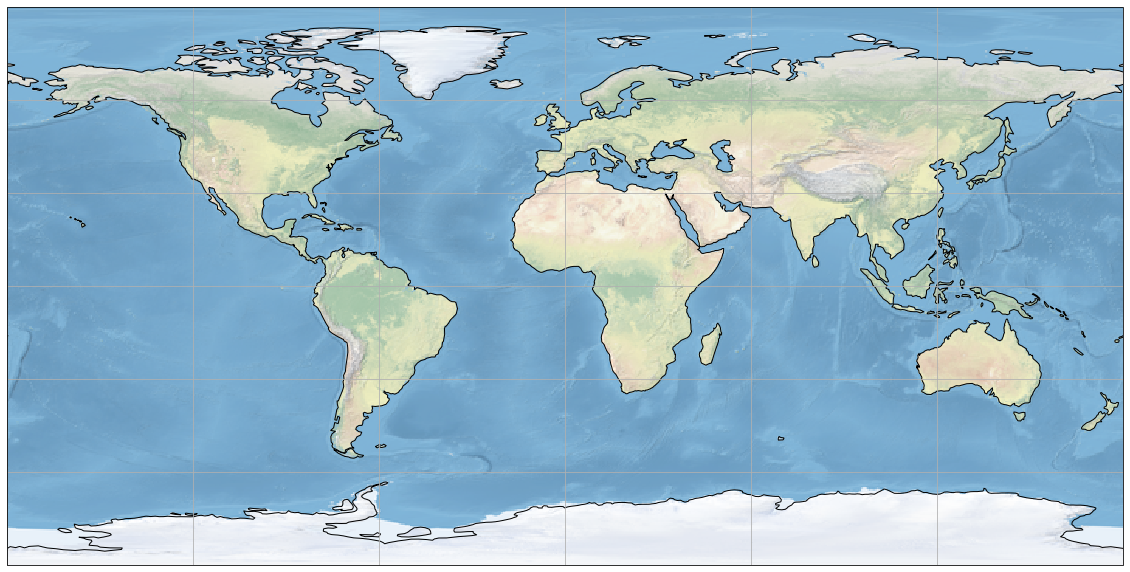

In [7]:
import matplotlib.pyplot as plt

import cartopy.crs as crs
import cartopy.feature as cfeature

fig = plt.figure(figsize=(20,16))

ax = fig.add_subplot(1,1,1, projection=crs.PlateCarree())
# ax = fig.add_subplot(1,1,1, projection=crs.Mercator())

ax.stock_img()
ax.coastlines()
ax.gridlines()

# ax.add_feature(cfeature.COASTLINE)
# ax.add_feature(cfeature.LAND, color="lightgrey", alpha=0.5)
# ax.add_feature(cfeature.LAKES, color="lime")
# ax.add_feature(cfeature.BORDERS, linestyle="--")
# ax.add_feature(cfeature.OCEAN, color="skyblue", alpha=0.4)
# ax.add_feature(cfeature.RIVERS, edgecolor="red")
# ax.add_feature(cfeature.STATES)

plt.show()

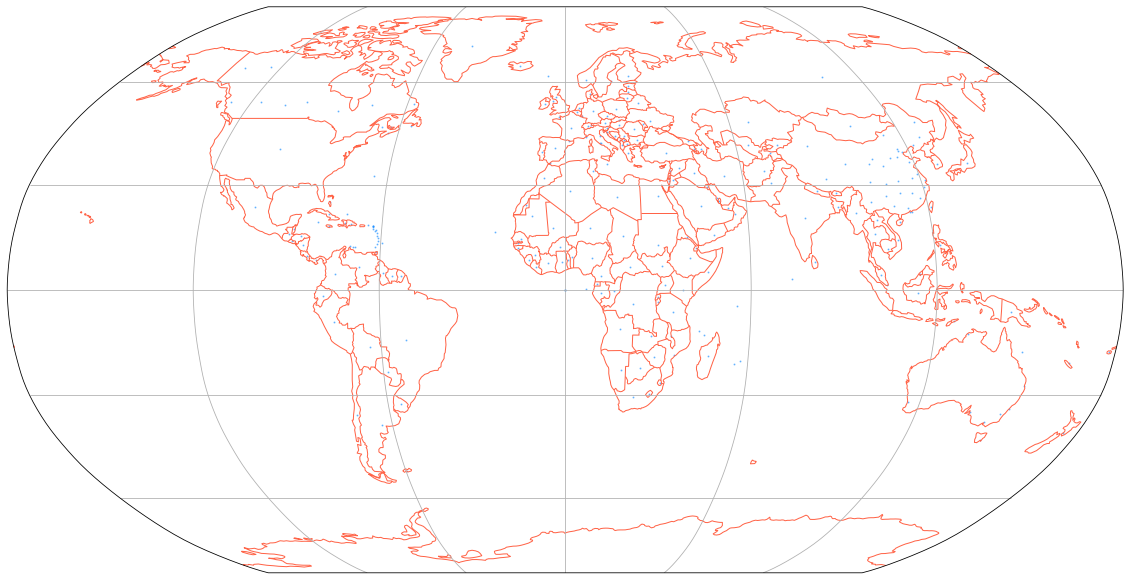

In [8]:
import matplotlib.pyplot as plt

import cartopy.crs as crs
import cartopy.feature as cfeature

fig = plt.figure(figsize=(20,16))

ax = fig.add_subplot(1,1,1, projection=crs.Robinson())

ax.set_global()

ax.add_feature(cfeature.COASTLINE, edgecolor="tomato")
ax.add_feature(cfeature.BORDERS, edgecolor="tomato")
ax.gridlines()

plt.scatter(x=countries.Long, y=countries.Lat,
            color="dodgerblue",
            s=1,
            alpha=0.5,
            transform=crs.PlateCarree()) ## Important

plt.show()

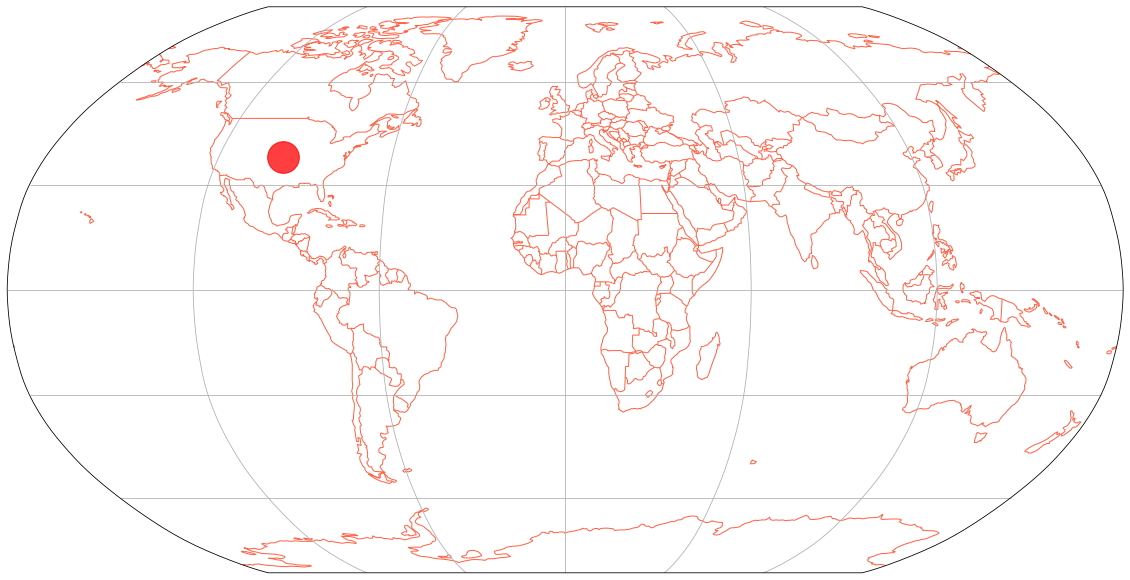

In [15]:
import matplotlib.pyplot as plt

import cartopy.crs as crs
import cartopy.feature as cfeature

fig = plt.figure(figsize=(20,16))

ax = fig.add_subplot(1,1,1, projection=crs.Robinson())

ax.set_global()

ax.add_feature(cfeature.COASTLINE, edgecolor="tomato")
ax.add_feature(cfeature.BORDERS, edgecolor="tomato")
ax.gridlines()

plt.scatter(x=ipdf.longitude, y=ipdf.latitude,
            color="red",
            s=1000,
            alpha=0.5,
            transform=crs.PlateCarree()) ## Important

plt.show()